In [0]:
!pip install tensorflow==2.0.0-rc0

     |████████████████████████████████| 86.3MB 49kB/s 
     |████████████████████████████████| 4.3MB 30.9MB/s 
     |████████████████████████████████| 501kB 48.0MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Counting objects: 100% (27577/27577), done.
remote: Compressing objects: 100% (27576/27576), done.
remote: Total 27577 (delta 3), reused 27565 (delta 0), pack-reused 0
Receiving objects: 100% (27577/27577), 331.67 MiB | 56.28 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


Set Image Width and Height

In [0]:
img_width = 64
img_height = 64

Convert Image into Binary Format [0-1]

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

Train Data

In [0]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size=(img_width,img_height),
                                                   class_mode = 'binary',
                                                   batch_size=16,
                                                   subset = 'training')

Found 22048 images belonging to 2 classes.


Test Data

In [0]:
valiation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size=(img_width,img_height),
                                                   class_mode = 'binary',
                                                   batch_size=16,
                                                   subset = 'validation')

Found 5510 images belonging to 2 classes.


In [0]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
valiation_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Build CNN Model

In [0]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width,img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_data_generator,
                    steps_per_epoch=len(train_data_generator),
                    epochs=5,
                     validation_data=valiation_data_generator,
                    validation_steps=len(valiation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 157s 114ms/step - loss: 0.4871 - accuracy: 0.7734 - val_loss: 0.2933 - val_accuracy: 0.9089
Epoch 2/5
1378/1378 [==============================] - 157s 114ms/step - loss: 0.2365 - accuracy: 0.9262 - val_loss: 0.2052 - val_accuracy: 0.9274
Epoch 3/5
1378/1378 [==============================] - 156s 113ms/step - loss: 0.1969 - accuracy: 0.9386 - val_loss: 0.1942 - val_accuracy: 0.9347
Epoch 4/5
1378/1378 [==============================] - 155s 112ms/step - loss: 0.1819 - accuracy: 0.9443 - val_loss: 0.1794 - val_accuracy: 0.9377
Epoch 5/5
1378/1378 [==============================] - 161s 117ms/step - loss: 0.1704 - accuracy: 0.9468 - val_loss: 0.1617 - val_accuracy: 0.9448


In [0]:
history.history

{'accuracy': [0.7734488, 0.9261611, 0.9386339, 0.9443487, 0.94675255],
 'loss': [0.4870840733578896,
  0.236532491463519,
  0.19687555882679664,
  0.1818500202837169,
  0.17035218890477918],
 'val_accuracy': [0.9088929, 0.9274047, 0.93466425, 0.93774956, 0.94482756],
 'val_loss': [0.2932548440236976,
  0.20523752255932146,
  0.19418684805648914,
  0.17941254170584506,
  0.16172460527901633]}

In [0]:
def plot_learning_curve(history,epoch):

  epochs_range = range(1,epoch+1)
  plt.plot(epochs_range,history.history['accuracy'])
  plt.plot(epochs_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuaracy')
  plt.xlabel('Epochs')
  plt.legend(['Train','Val'], loc = 'upper left')
  plt.show()


  plt.plot(epochs_range,history.history['loss'])
  plt.plot(epochs_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Train','Val'], loc = 'upper left')
  plt.show()

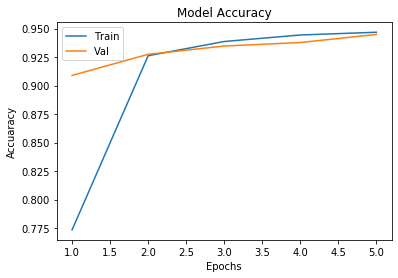

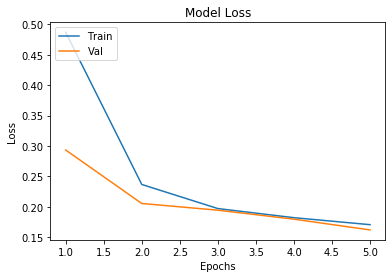

In [0]:
plot_learning_curve(history,5)